In [66]:
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
%matplotlib inline

1) Загрузите выборку из файла gbm-data.csv с помощью pandas и преобразуйте ее в массив numpy (параметр values у датафрейма). В первой колонке файла с данными записано, была или нет реакция. Все остальные колонки (d1 - d1776) содержат различные характеристики молекулы, такие как размер, форма и т.д. Разбейте выборку на обучающую и тестовую, используя функцию train_test_split с параметрами test_size = 0.8 и random_state = 241.

In [67]:
data = pd.read_csv('csv_dataframes/gbm-data.csv')
X = data.loc[:, 'D1':'D1776']
Y = data['Activity']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=241)
#test_size - the proportion of the dataset to include in the test split
#data.as_matrix() - from dataframe to nd.array
data

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.00,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.00,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.00,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.50,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.00,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0
5,0,0.133333,0.771035,0.20,0.25,0.122153,0.677398,0.267224,0.611112,0.701421,...,0,0,0,0,0,0,0,0,0,0
6,1,0.066700,0.567401,0.10,0.00,0.116578,0.689802,0.274886,0.548509,0.785429,...,0,0,0,0,0,0,0,0,0,0
7,1,0.133333,0.610057,0.15,0.00,0.105176,0.759602,0.313393,0.491790,0.756010,...,0,0,1,0,1,0,0,0,0,0
8,1,0.000000,0.776816,0.05,0.00,0.458446,0.738631,0.246347,0.067800,0.751861,...,0,0,0,0,0,0,0,0,0,0
9,0,0.100000,0.768150,0.10,0.25,0.262299,0.598972,0.377065,0.394514,0.673797,...,0,0,0,0,0,0,0,0,0,0


2) Обучите GradientBoostingClassifier с параметрами n_estimators=250, verbose=True, random_state=241 и для каждого значения learning_rate из списка [1, 0.5, 0.3, 0.2, 0.1] проделайте следующее:

$\bullet$ Используйте метод staged_decision_function для предсказания качества на обучающей и тестовой выборке на каждой итерации.

$\bullet$ Преобразуйте полученное предсказание с помощью сигмоидной функции по формуле 1 / (1 + e^{−y_pred}), где y_pred — предсказанное значение.

$\bullet$ Вычислите и постройте график значений log-loss (которую можно посчитать с помощью функции sklearn.metrics.log_loss) на обучающей и тестовой выборках, а также найдите минимальное значение метрики и номер итерации, на которой оно достигается.

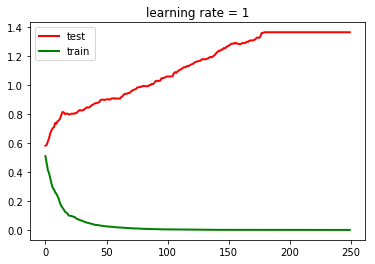

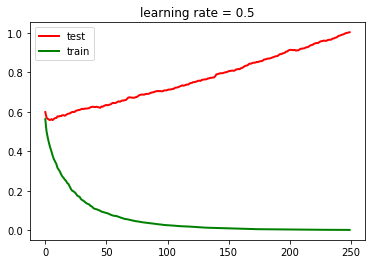

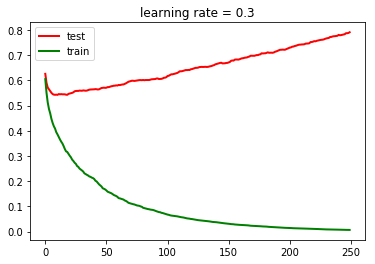

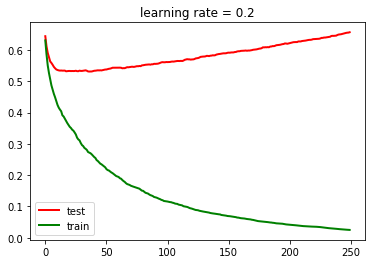

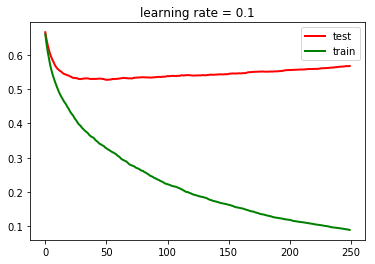

In [68]:
learning_rates = [1, 0.5, 0.3, 0.2, 0.1]
rates_dict = {}

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

for rate in learning_rates:
    #n_estimators - The number of boosting stages to perform.
    #Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
    #versobe - it is generally an option for producing detailed logging information
    model = GradientBoostingClassifier(learning_rate = rate, n_estimators=250, verbose=False, random_state=241)
    model.fit(X_train, y_train)
    
    #staged_decision_function - Compute decision function of X for each iteration.
    #This method allows monitoring (i.e. determine error on testing set) after each stage.
    #каждая итерация (шкала ox внизу на графике) - обучение алгоритма вплоть до n_estimators=250
    #на каждой итерации обучения проверям качество на тестовой выборке
    scores_train = []
    for x in model.staged_decision_function(X_train):
        scores_train.append(log_loss(Y_train, [sigmoid(i) for i in x]))
    
    scores_test = []
    for x in model.staged_decision_function(X_test):
        scores_test.append(log_loss(Y_test, [sigmoid(i) for i in x]))
        
    min_score_test = min(scores_test)
    index_min_score_trst = scores_test.index(min_score_test)
    rates_dict[rate] = [min_score_test, index_min_score_trst + 1]
        
    plt.figure()
    plt.plot(scores_test, 'red', linewidth=2)
    plt.plot(scores_train, 'green', linewidth=2)
    plt.title('learning rate = {}'.format(rate))
    plt.legend(['test', 'train'])

3) Как можно охарактеризовать график качества на тестовой выборке, начиная с некоторой итерации: переобучение (overfitting) или недообучение (underfitting)? В ответе укажите одно из слов overfitting либо underfitting. - 'overfitting'

In [69]:
print('overfitting')

overfitting


4) Приведите минимальное значение log-loss на тестовой выборке и номер итерации, на котором оно достигается, при learning_rate = 0.2.

In [70]:
rates_data = pd.DataFrame.from_dict(rates_dict, orient = 'index').rename(columns={0: "min score test", 1: "index"})
rates_data.index.name = 'learning rates'
rates_data

,min score test,index
learning rates,,
1.0,0.582294,1
0.5,0.558203,7
0.3,0.542314,11
0.2,0.531095,37
0.1,0.526920,52


In [71]:
print(round(rates_data['min score test'][0.2],2), rates_data['index'][0.2])

0.53 37


5) На этих же данных обучите RandomForestClassifier с количеством деревьев, равным количеству итераций, на котором достигается наилучшее качество у градиентного бустинга из предыдущего пункта, c random_state=241 и остальными параметрами по умолчанию. Какое значение log-loss на тесте получается у этого случайного леса? (Не забывайте, что предсказания нужно получать с помощью функции predict_proba. В данном случае брать сигмоиду от оценки вероятности класса не нужно)

In [72]:
number_of_trees = list(rates_data['index'])

scores_random_forest = []

for trees in number_of_trees:
    model = RandomForestClassifier(n_estimators=trees, random_state=241)
    model.fit(X_train, Y_train)
    #log-loss on test data    
    scores_random_forest.append(log_loss(Y_test, model.predict_proba(X_test)))

rates_data['scores random forest'] = scores_random_forest
rates_data

,min score test,index,scores random forest
learning rates,,,
1.0,0.582294,1,13.339034
0.5,0.558203,7,1.170311
0.3,0.542314,11,0.715060
0.2,0.531095,37,0.540912
0.1,0.526920,52,0.538159


In [73]:
#min score test for LR rate = 0.1
round(rates_data['scores random forest'][0.1], 2)

0.54